# Machine Learning Analysis for Early Detection of Heart Failure

## Import data

In [1]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocess the heart disease dataset, including handling outliers, categorical encoding, feature standardization, and data splitting.
"""

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display

data_file = os.path.join(os.getcwd(), '..','data', 'heart.csv')
print(os.getcwd())

# Check if the data file exists
if not os.path.exists(data_file):
    display(f"Data file not found: {data_file}")
else:
    try:
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully, shape: {data.shape}")  # Expected shape is (918, 12)
    except Exception as e:
        display(f"Error loading data: {e}")


/Users/yaoyue/Desktop/CS/DSML/Coursework/DSML-cw2/feature_implementation
Data loaded successfully, shape: (918, 12)


---
## Preprocessing

In [2]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocessing the heart disease dataset
"""

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display

# Go up one directory to access the dataset
data_file = os.path.join(os.getcwd(), '..', 'data', 'heart.csv')
# Check if the data file exists
if not os.path.exists(data_file):
    display(f"Data file not found: {data_file}")
else:
    try:
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully, shape: {data.shape}")  # Expected shape is (918, 12)
    except Exception as e:
        display(f"Error loading data: {e}") 
    
    # Handling outliers
    '''
    deng.wei: Blood pressure and cholesterol should not be zero
    '''
    bp_zero_count = (data['RestingBP'] == 0).sum()
    chol_zero_count = (data['Cholesterol'] == 0).sum()
    data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].median())
    data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].median())
    print("Outlier handling completed")
    print(f"Outlier handling: Replaced {bp_zero_count} zero values in blood pressure, {chol_zero_count} zero values in cholesterol")
    
    '''
    yue.yao: Copy global data for EDA analysis
    '''
    eda_data = data.copy()
    
    # Category encoding
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    print("Categorical feature encoding completed")

    # Splitting dataset
    X = data.drop('HeartDisease', axis=1)
    y = data['HeartDisease']
    
    # First, split into training and temporary sets (80% for training, 20% for temporary)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    
    # Then, split the temporary set into validation and test sets (each 10% of the original data)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size=0.5, 
        random_state=42, 
        stratify=y_temp
    )
    
    print(f"Dataset split completed:")
    print(f"Training set {X_train.shape} ({len(X_train)/len(X):.1%})")
    print(f"Validation set {X_val.shape} ({len(X_val)/len(X):.1%})")
    print(f"Test set {X_test.shape} ({len(X_test)/len(X):.1%})")
    
    # Standardizing numerical features
    numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    # Remove the line: data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    # Because standardization is done only for training, validation, and test sets

    # Standardizing the training set using its mean and standard deviation
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

    # Standardizing the validation and test sets using the training set's mean and standard deviation
    X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    print("Numerical feature standardization completed")


Data loaded successfully, shape: (918, 12)
Outlier handling completed
Outlier handling: Replaced 1 zero values in blood pressure, 172 zero values in cholesterol
Categorical feature encoding completed
Dataset split completed:
Training set (734, 11) (80.0%)
Validation set (92, 11) (10.0%)
Test set (92, 11) (10.0%)
Numerical feature standardization completed


## Dataset Persistence

In [5]:
"""
Dataset Persistence
Author: deng.wei
Date: 4.15
"""
# Combine features and labels for export
train_full = X_train.copy()
train_full["HeartDisease"] = y_train

val_full = X_val.copy()
val_full["HeartDisease"] = y_val

# Not include the reult in test data
test_full = X_test.copy()

# Create 'data_dir' folder if it doesn't exist
data_dir = os.path.join(os.getcwd(), '..', 'data')
os.makedirs(data_dir, exist_ok=True)


# Define output paths
train_path = os.path.join(data_dir, f"train_set_snapshot_.csv")
val_path   = os.path.join(data_dir, f"val_set_snapshot_.csv")
test_path  = os.path.join(data_dir, f"test_set_snapshot_.csv")

train_full.to_csv(train_path, index=False)
val_full.to_csv(val_path, index=False)
test_full.to_csv(test_path, index=False)

print("Dataset snapshots saved")
print(f"Training set: {train_path}")
print(f"Validation set: {val_path}")
print(f"Test set: {test_path}")


Dataset snapshots saved
Training set: /Users/dengwei/DSML/feature_implementation/../report/train_set_snapshot_.csv
Validation set: /Users/dengwei/DSML/feature_implementation/../report/val_set_snapshot_.csv
Test set: /Users/dengwei/DSML/feature_implementation/../report/test_set_snapshot_.csv


---
## Exploratory Data Analysis (EDA)

In [4]:
"""
探索性分析数据EDA
作者: yue.yao
日期: 4.6
功能: 对心脏疾病数据集进行探索性分析，完成数据可视化
"""
import matplotlib.pyplot as plt
import seaborn as sns

# 数据全局概览
eda_data.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.538126,240.581699,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,17.990127,53.982967,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,214.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
# 检测空值
eda_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# 检测重复数据
eda_data.duplicated().sum()

0

In [7]:
# 概览非数值数据分布
for i in eda_data.columns:
  if eda_data[i].dtype == 'object':
    print(f'column : {i}')
    print(eda_data[i].value_counts())
    print('----------------------------')

column : Sex
Sex
M    725
F    193
Name: count, dtype: int64
----------------------------
column : ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------
column : RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------
column : ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------
column : ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------


In [8]:
# 对数值数据进行相关性分析
num_cor = eda_data.corr(numeric_only=True)
num_cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263054,0.030979,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.263054,1.000000,0.090835,0.067896,-0.109771,0.174130,0.117798
Cholesterol,0.030979,0.090835,1.000000,-0.008045,0.026734,0.056731,0.042988
FastingBS,0.198039,0.067896,-0.008045,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.109771,0.026734,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174130,0.056731,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117798,0.042988,0.267291,-0.400421,0.403951,1.000000


<Axes: >

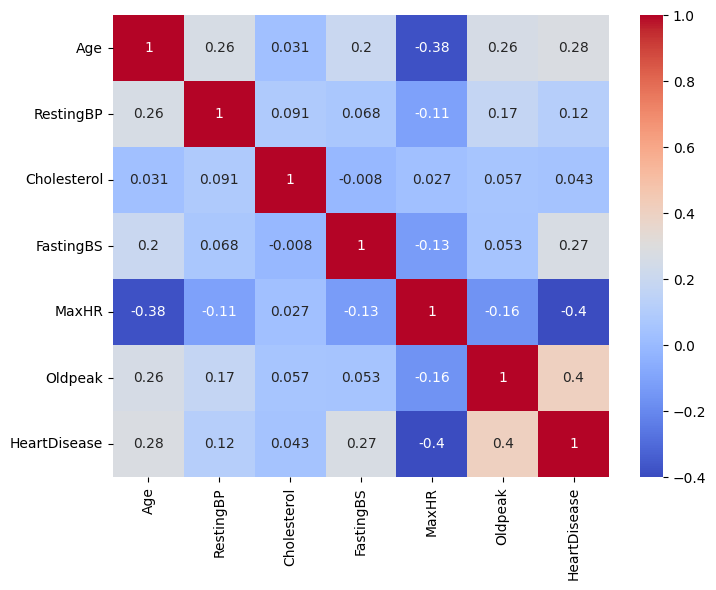

In [9]:
# 绘制相关性热力图
plt.figure(figsize=(8,6))
sns.heatmap(num_cor, annot=True, cmap='coolwarm')

> 结论：  
与HeartDisease相关性较高的数据是Oldpeak，FastingBS，Age  
> Conclusion:  
The data with high correlation with HeartDisease are Oldpeak, FastingBS, and Age

In [10]:
# 对比Oldpeak对于患病和非患病人群的平均数值分布
print(eda_data.groupby('HeartDisease')['Oldpeak'].describe())

              count      mean       std  min  25%  50%  75%  max
HeartDisease                                                    
0             410.0  0.408049  0.699709 -1.1  0.0  0.0  0.6  4.2
1             508.0  1.274213  1.151872 -2.6  0.0  1.2  2.0  6.2


<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

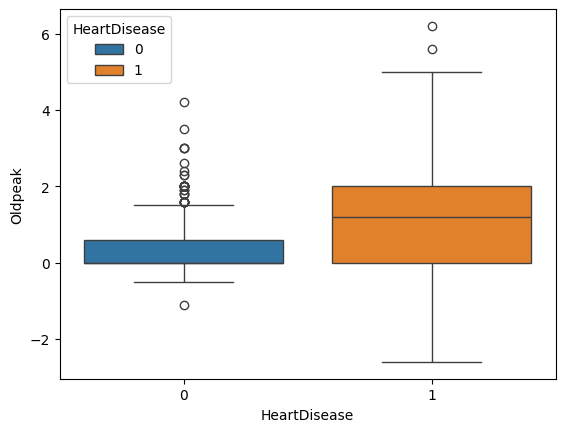

In [11]:
# 箱型图对比Oldpeak数值分布
sns.boxplot(x='HeartDisease', y='Oldpeak', data=eda_data, hue='HeartDisease')

> 结论：  
心力衰竭患者的Oldpeak指数通常比非患者要高，数值大多分布在1.5及以上  
Conclusion:  
The Oldpeak index was generally higher in patients with heart failure than in non-patients, with values of 1.5 and above mostly distributed

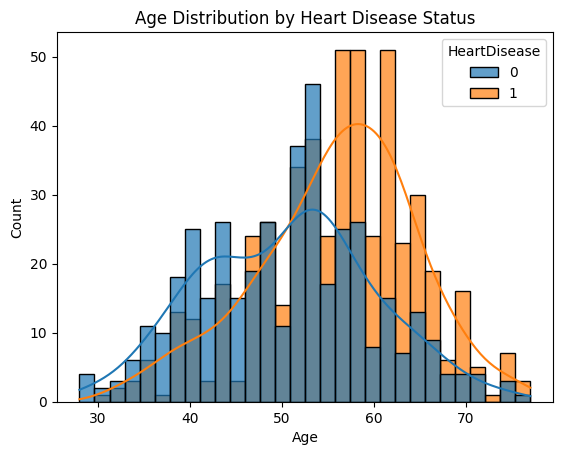

In [12]:
# 患者和非患者的年龄分布
sns.histplot(
    data=eda_data, 
    x='Age', 
    hue='HeartDisease',
    bins=30, 
    kde=True, 
    alpha=0.7
)
plt.title("Age Distribution by Heart Disease Status")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Age'>

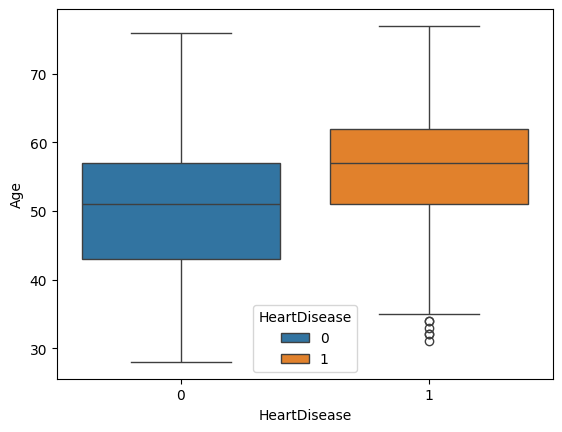

In [13]:
# 箱型图对比Age数值分布
sns.boxplot(x='HeartDisease', y='Age', data=eda_data, hue='HeartDisease')

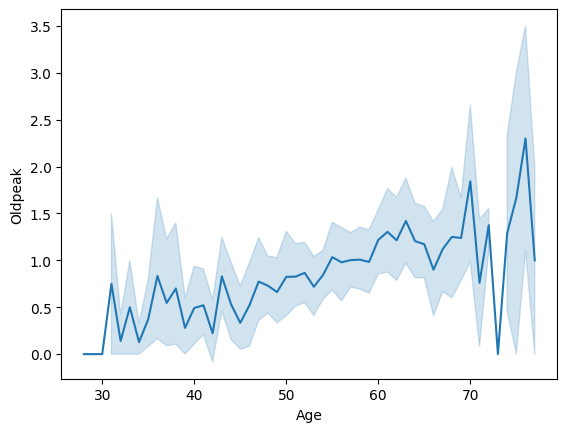

In [14]:
# 静息血压岁年龄变化
sns.lineplot(x='Age', y='Oldpeak', data=eda_data)
plt.show()

> 结论：  
Oldpeak数值随年龄增大而增加。心力衰竭患者数量随年龄上升而增加，大多患者年龄分布在60岁左右。  
Conclusion:  
Oldpeak value increases with age. The number of heart failure patients increases with age, and most patients are around 60 years old.

<Axes: xlabel='HeartDisease', ylabel='FastingBS'>

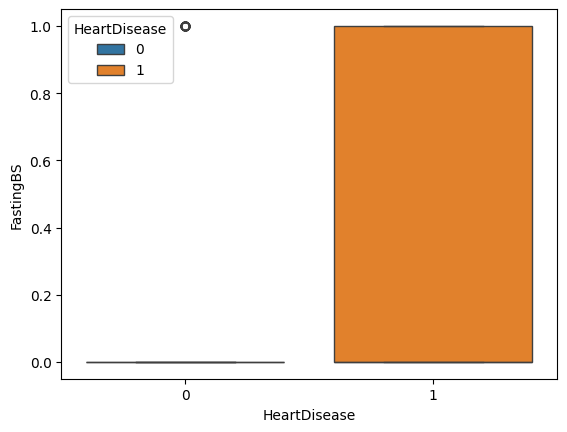

In [15]:
# 箱型图对比FastingBS数值分布
sns.boxplot(x='HeartDisease', y='FastingBS', data=eda_data, hue='HeartDisease')

> 结论：  
心力衰竭患者普遍能检测到FastingBS数值分布在0-1之间，而非患者普遍数值为0。FastingBS数值与患病情况强相关。  
Conclusion:  
Patients with heart failure generally had FastingBS values ranging from 0 to 1, while non-patients generally had values of 0. FastingBS values were strongly correlated with disease status.

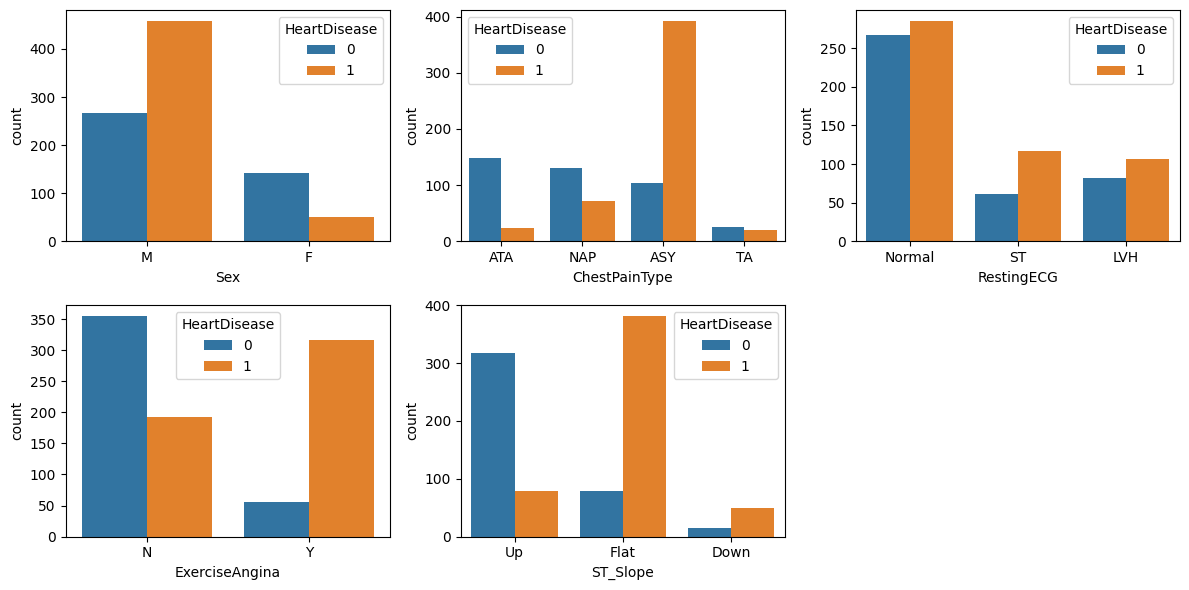

In [16]:
# 非数值数据的患病分布
categoricalfeatures = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
plt.figure(figsize=(12, 6))
for i in categoricalfeatures:
    ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
    sns.countplot(x= eda_data[i] , hue = eda_data['HeartDisease'])
plt.tight_layout()
plt.show()

> 结论：  
1.心力衰竭患者在男性中占比更高，在女性中占比低。  
2.在几种胸痛类型中，患者表现出无症状的数量最多。  
3.RestingECG在患者和非患者间表现出数值相差不明显。  
4.在患者中，运动诱发性心绞痛占比例较高。  
5.根据ST_Slope数值显示，患者大多ST曲线表现为水平型。  
Conclusion:  
1.Heart failure is more common in men and less common in women.  
2.Of the several types of chest pain, the largest number of patients showed no symptoms.  
3.RestingECG showed no significant difference in values between patients and non-patients.  
4.Exercise-induced angina pectoris accounted for a high proportion of patients.  
5.According to the value of ST_Slope, the ST curve of most patients is horizontal.

/var/folders/00/4sv93fnd3yz1qvh8ds_7yfz80000gn/T/ipykernel_51979/353332979.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


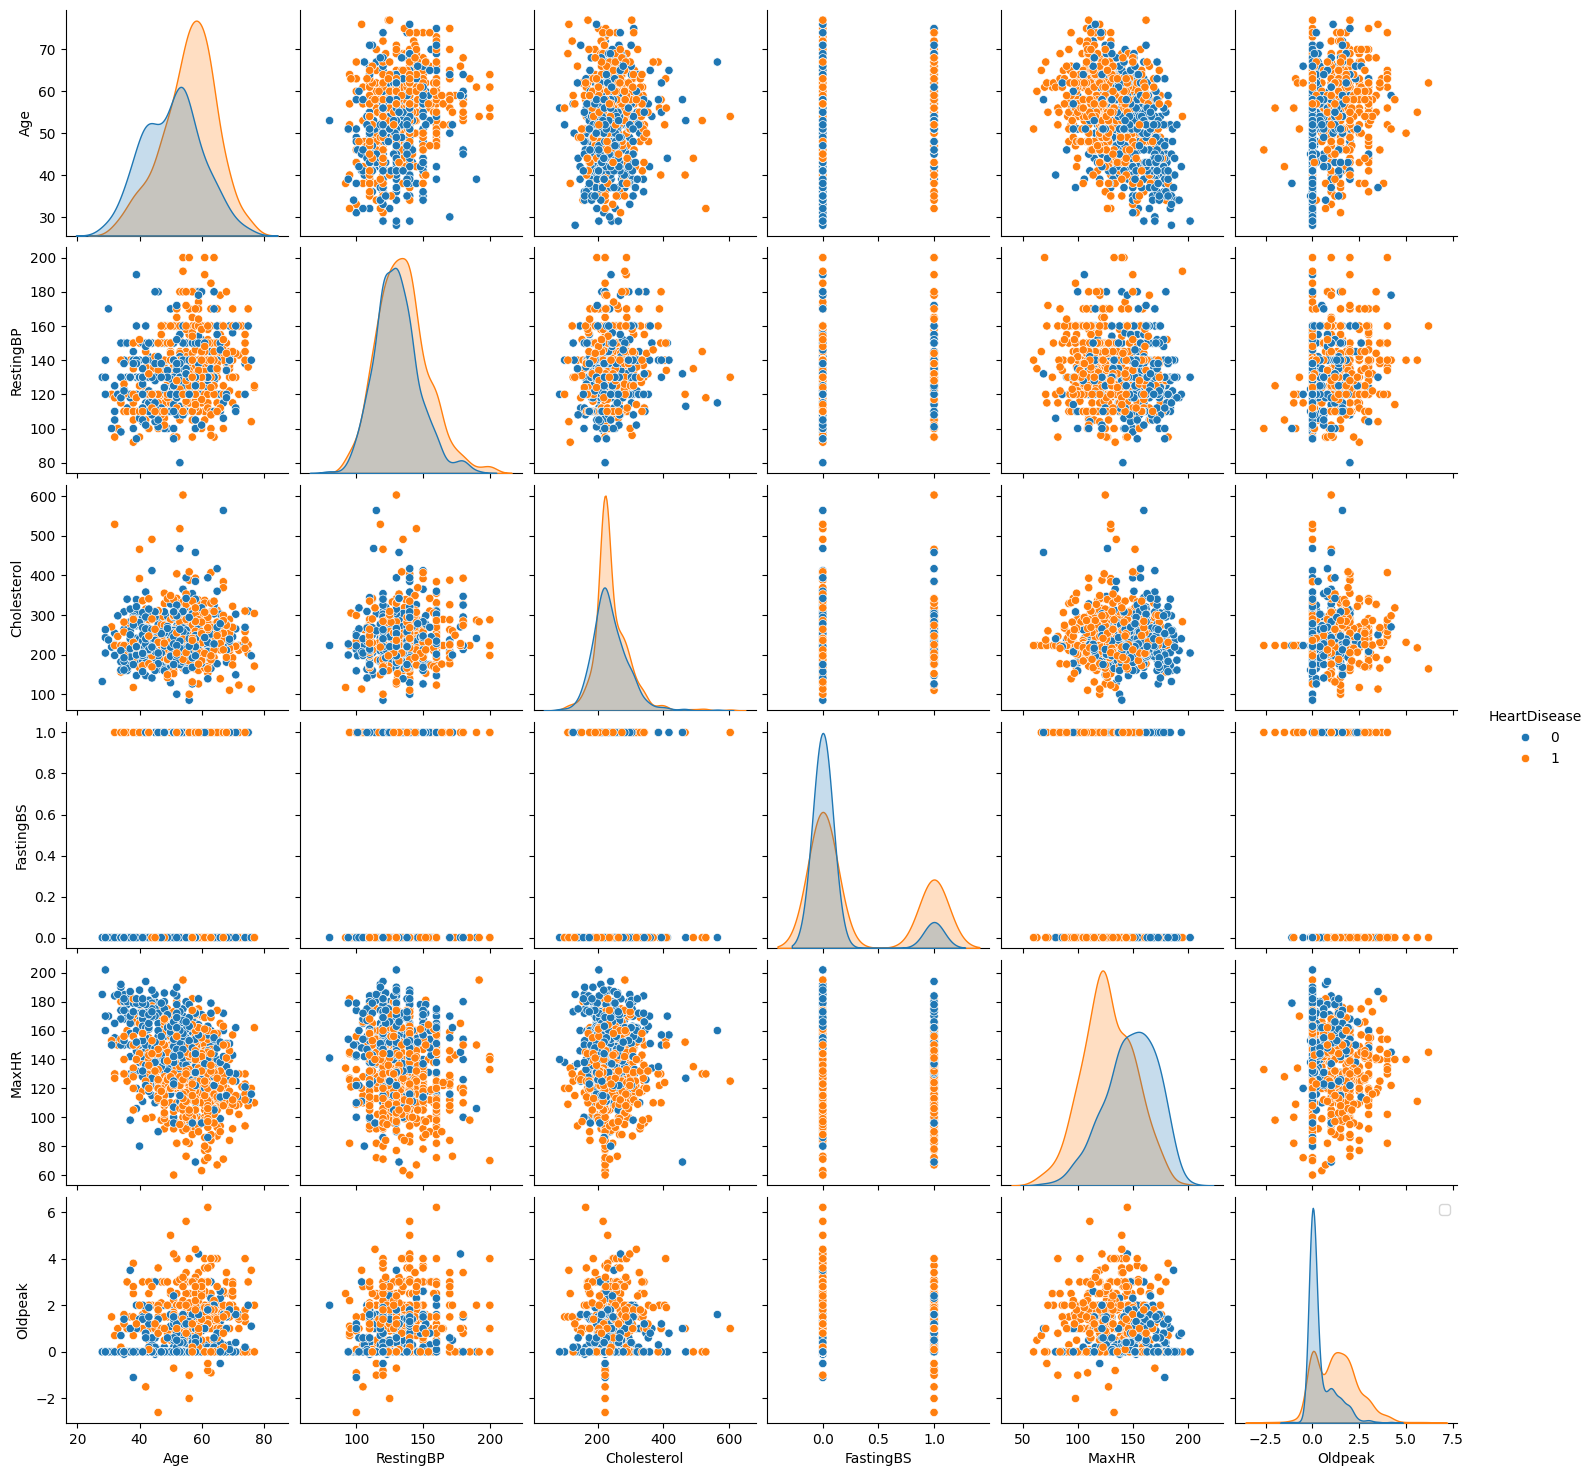

In [17]:
# 散点图矩阵
sns.pairplot(eda_data,hue='HeartDisease')
plt.legend()

---
## Model Analysis

### Public function(Making code more elegent)

In [18]:
"""
Author: deng.wei
Date: 4.15
Function: To generate metrix images by elegant way
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title="Confusion Matrix", labels=["0", "1"]):
    """
    Function to plot confusion matrix.

    Parameters:
    cm : ndarray
        Confusion matrix to be plotted.
    title : str
        Title of the plot.
    labels : list
        List of labels for the confusion matrix (default is ["0", "1"]).
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [19]:
"""
Author: deng.wei
Date: 4.15
Function: To generate evaluation indicators by elegant way(WITHOUT validation_set)
"""
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


def evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred):
    print("Training Set:")
    print(f"Accuracy     : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision    : {precision_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_train, y_train_pred):.4f}")
    print(f"Recall       : {recall_score(y_train, y_train_pred):.4f}")

    print("\nTest Set:")
    print(f"Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_test_pred):.4f}")


In [20]:
"""
Author: deng.wei
Date: 4.15
Function: To generate evaluation indicators by elegant way(INCLUDING validation_set)
"""
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def evaluate_model_outputs(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    print("Training Set:")
    print(f"Accuracy     : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision    : {precision_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_train, y_train_pred):.4f}")
    print(f"Recall       : {recall_score(y_train, y_train_pred):.4f}")

    print("\nValidation Set:")
    print(f"Accuracy     : {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Precision    : {precision_score(y_val, y_val_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_val, y_val_pred):.4f}")
    print(f"Recall       : {recall_score(y_val, y_val_pred):.4f}")

    print("\nTest Set:")
    print(f"Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_test_pred):.4f}")


In [21]:
"""
Author: yue.yao
Date: 4.19
Function: The scoring data stored in each model is used for the final comprehensive evaluation and comparison
"""
model_scores = {}

def save_model_scores(y_train, y_train_pred, y_test, y_test_pred, module_name, cv_mean, y_test_proba):
    model_scores[module_name] = {
        # Test set index
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        # Training set index
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Train F1": f1_score(y_train, y_train_pred),
        # Optional: Cross-validation (if any)
        "CV Mean Accuracy": cv_mean,
        "y_test_proba": y_test_proba
    }

### 1.KNN 

Training Set:
Accuracy     : 0.8624
Precision    : 0.8692
F1 Score     : 0.8767
Recall       : 0.8842

Test Set:
Accuracy     : 0.8587
Precision    : 0.8654
F1 Score     : 0.8738
Recall       : 0.8824

Cross-Validation (5-Fold):
CV Scores    : [0.87755102 0.81632653 0.82993197 0.78231293 0.7739726 ]
Mean Accuracy: 0.8160

Best K value: 7
Test set accuracy after tuning: 0.8587


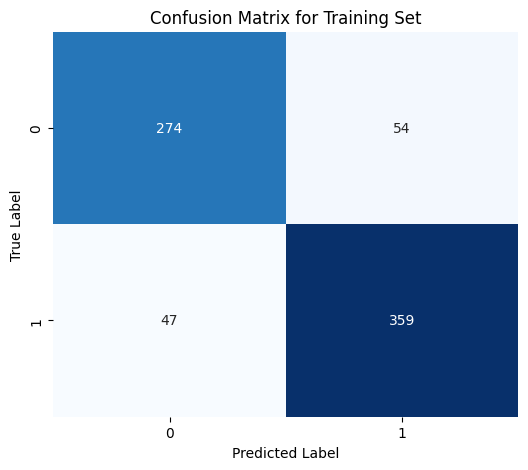

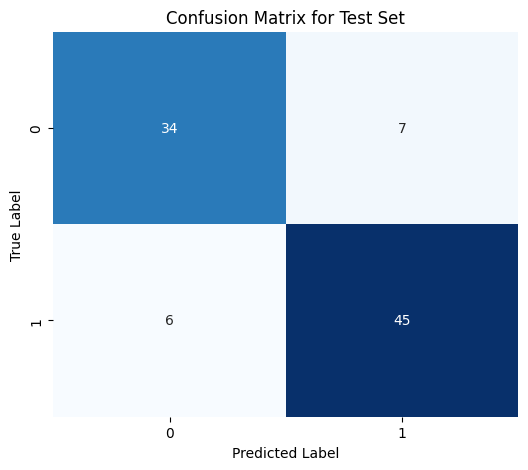

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

model_scores = {}
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

# Cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation (5-Fold):")
print(f"CV Scores    : {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Tune K value using CV
k_range = range(1, 21)
cv_results = []
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_results.append(score)

best_k = k_range[cv_results.index(max(cv_results))]
print(f"\nBest K value: {best_k}")

# Retrain with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_test_pred_best = knn_best.predict(X_test)
print(f"Test set accuracy after tuning: {accuracy_score(y_test, y_test_pred_best):.4f}")

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "KNN", cv_scores.mean(), knn.predict_proba(X_test)[:, 1])

### 2.Decision Tree

Training Set:
Accuracy     : 0.8815
Precision    : 0.8825
F1 Score     : 0.8943
Recall       : 0.9064

Test Set:
Accuracy     : 0.7609
Precision    : 0.7843
F1 Score     : 0.7843
Recall       : 0.7843


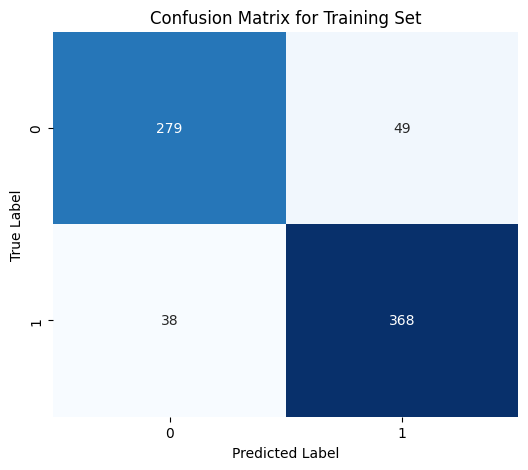

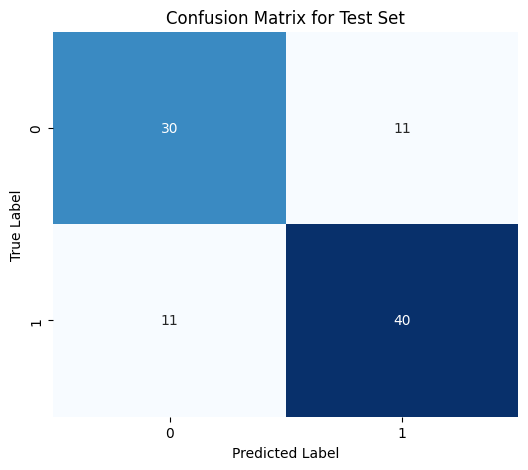

In [23]:
"""
Decision Tree Model
Author: deng.wei
Date: 4.14
Function: Decision Tree model implementation and evaluation
"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree", None, dt.predict_proba(X_test)[:, 1])

### 3.Random Forest

Training Set:
Accuracy     : 0.9414
Precision    : 0.9311
F1 Score     : 0.9480
Recall       : 0.9655

Validation Set:
Accuracy     : 0.8804
Precision    : 0.9167
F1 Score     : 0.8889
Recall       : 0.8627

Test Set:
Accuracy     : 0.8478
Precision    : 0.8364
F1 Score     : 0.8679
Recall       : 0.9020

Cross-Validation (10-Fold):
CV Scores    : [0.90540541 0.87837838 0.83783784 0.83783784 0.83561644 0.84931507
 0.84931507 0.8630137  0.79452055 0.80821918]
Mean Accuracy: 0.8459


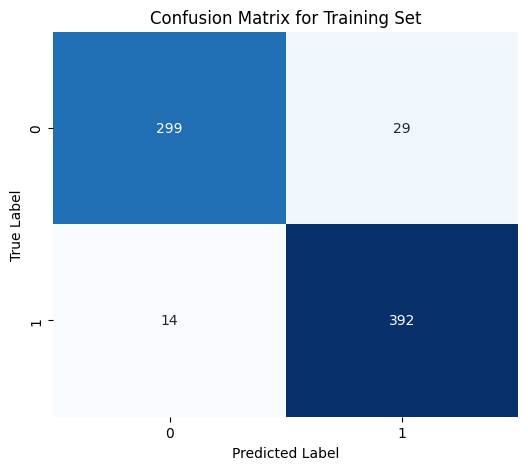

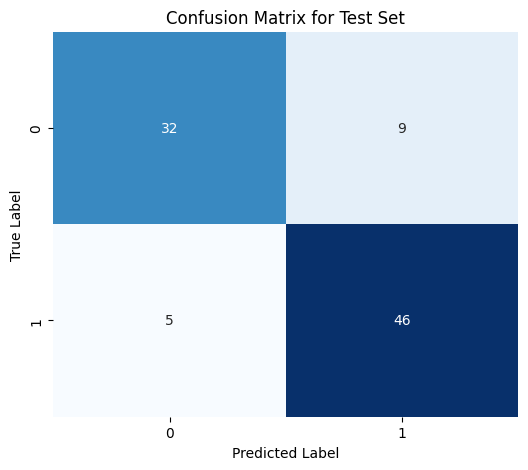

In [24]:
"""
Random Forest Model
Author: deng.wei
Date: 4.13
Function: Random Forest model implementation and evaluation
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest model
rf = RandomForestClassifier(
    random_state=42, 
    n_estimators=100,
    max_depth=8,
    min_samples_split=6,
    min_samples_leaf=3
)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)


# Evaluate with your shared evaluation function (train + val + test)
evaluate_model_outputs(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred)

# Cross-validation (10-fold)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy') 
print("\nCross-Validation (10-Fold):")
print(f"CV Scores    : {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Random Forest", cv_scores.mean(), rf.predict_proba(X_test)[:, 1])

### 4.Logistic Regression

Training Set:
Accuracy     : 0.8460
Precision    : 0.8600
F1 Score     : 0.8610
Recall       : 0.8621

Test Set:
Accuracy     : 0.8478
Precision    : 0.8491
F1 Score     : 0.8654
Recall       : 0.8824


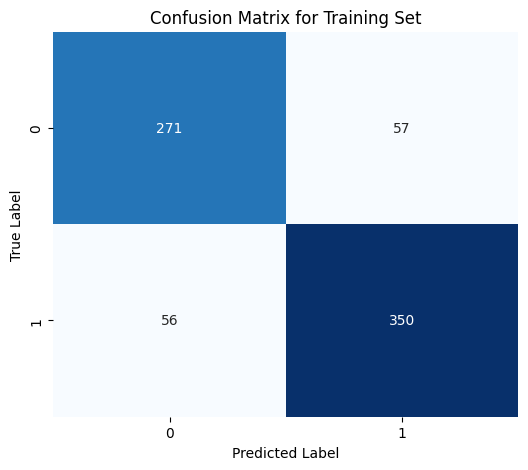

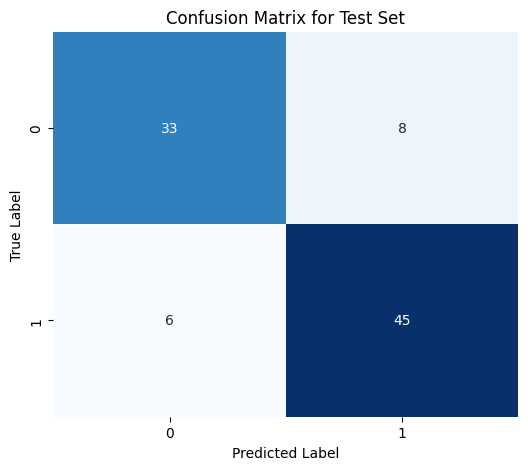

In [25]:
"""
Logistic Regression Model
Author: deng.wei
Date: 4.14
Function: Logistic Regression model implementation and evaluation
"""

from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)


# Evaluate using shared utility (no validation set)
evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Logistic Regression", None, log_reg.predict_proba(X_test)[:, 1])

### 5.SVM

Training Set:
Accuracy     : 0.8815
Precision    : 0.8789
F1 Score     : 0.8948
Recall       : 0.9113

Test Set:
Accuracy     : 0.8696
Precision    : 0.8679
F1 Score     : 0.8846
Recall       : 0.9020


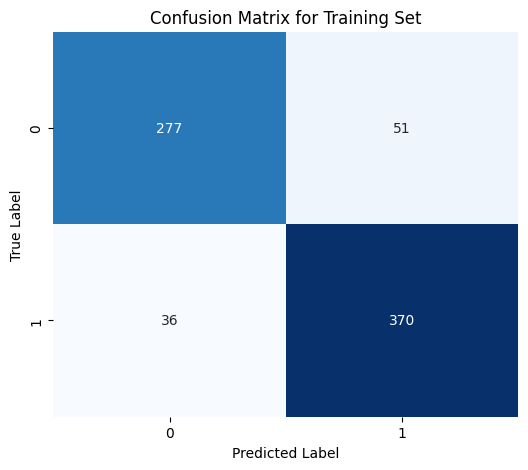

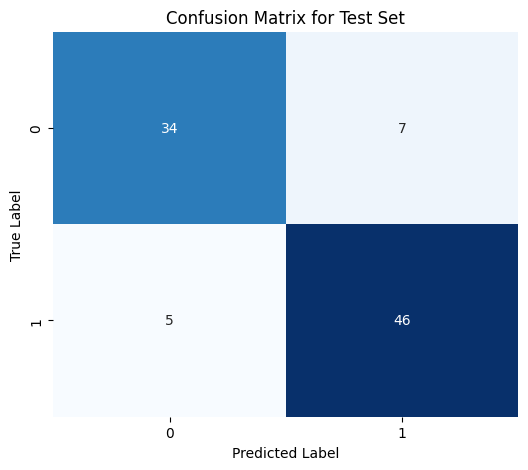

In [26]:
"""
SVM Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the SVM model
"""

from sklearn.svm import SVC

svm = SVC(probability=True,random_state=42)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)


evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "SVM", None, svm.predict_proba(X_test)[:, 1])

### 6.Naive Bayes

Training Set:
Accuracy     : 0.8351
Precision    : 0.8645
F1 Score     : 0.8482
Recall       : 0.8325

Test Set:
Accuracy     : 0.9022
Precision    : 0.9038
F1 Score     : 0.9126
Recall       : 0.9216


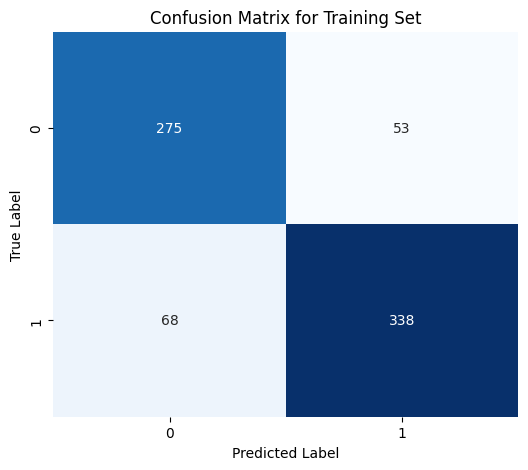

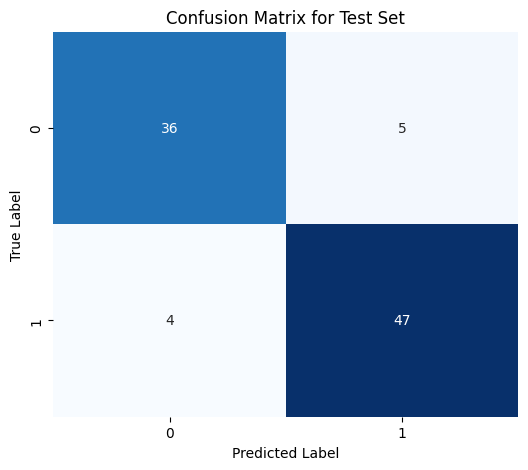

In [27]:
"""
Naive Bayes Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the Naive Bayes model
"""

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)


evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Naive Bayes", None, nb.predict_proba(X_test)[:, 1])

### 7.Neural Network

Training Set:
Accuracy     : 0.7916
Precision    : 0.8447
F1 Score     : 0.8021
Recall       : 0.7635

Test Set:
Accuracy     : 0.8152
Precision    : 0.9048
F1 Score     : 0.8172
Recall       : 0.7451

Cross-validation accuracy scores: [0.85034014 0.83673469 0.80952381 0.78911565 0.79452055]
Mean cross-validation accuracy: 0.8160


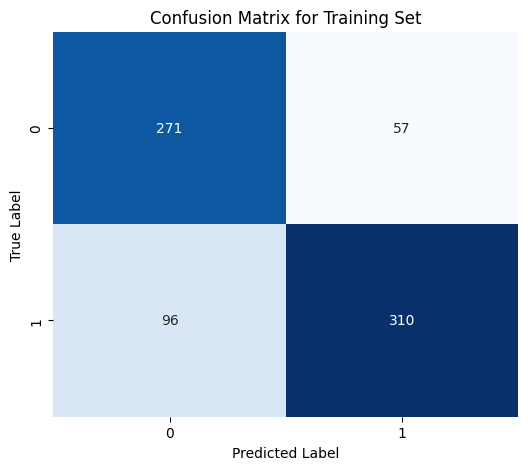

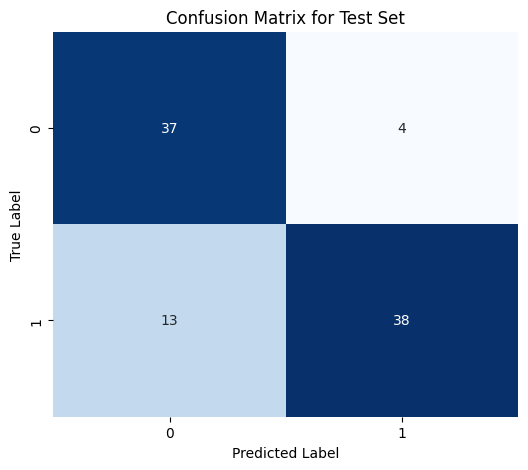

In [28]:
"""
Neural Network Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of a neural network model
"""

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Create a neural network model with regularization and early stopping
mlp = MLPClassifier(
    max_iter=1000,
    learning_rate_init=0.001,
    alpha=0.001,            # L2 regularization
    early_stopping=True,    # Enable early stopping
    random_state=42
)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)


evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cross_val_scores = cross_val_score(mlp, X_train, y_train, cv=5)
print(f"\nCross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Neural Network", cross_val_scores.mean(), mlp.predict_proba(X_test)[:, 1])

### 8.Gradient Descent 

Training Set:
Accuracy     : 0.8338
Precision    : 0.8923
F1 Score     : 0.8411
Recall       : 0.7956

Test Set:
Accuracy     : 0.8478
Precision    : 0.8776
F1 Score     : 0.8600
Recall       : 0.8431


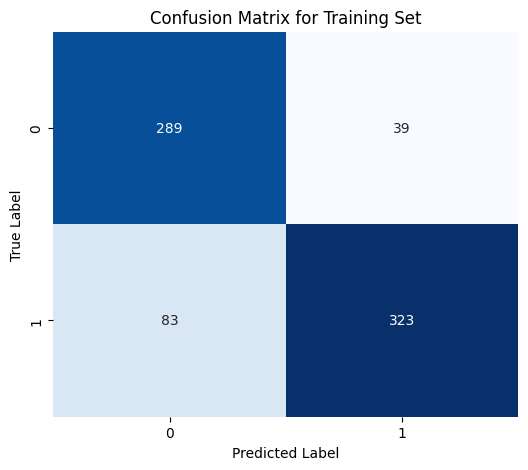

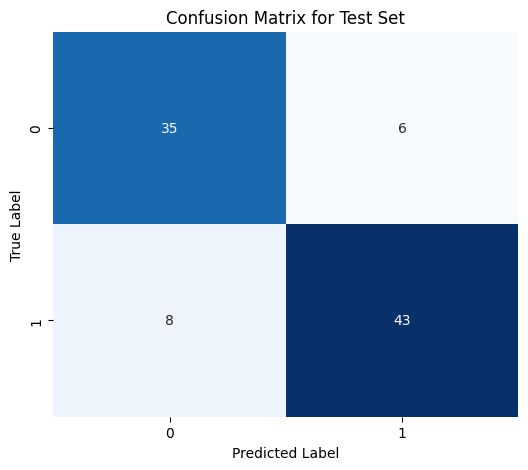

In [29]:
"""
Gradient Descent Model  
Author: deng.wei  
Date: 4.15  
Function: Implementation and evaluation of a gradient-based model
"""

from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(X_train, y_train)

y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
y_test_score = sgd.decision_function(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Gradient Descent", None, y_test_score)

---
## Model Evaluation

/var/folders/00/4sv93fnd3yz1qvh8ds_7yfz80000gn/T/ipykernel_51979/465552679.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ].fillna(0)


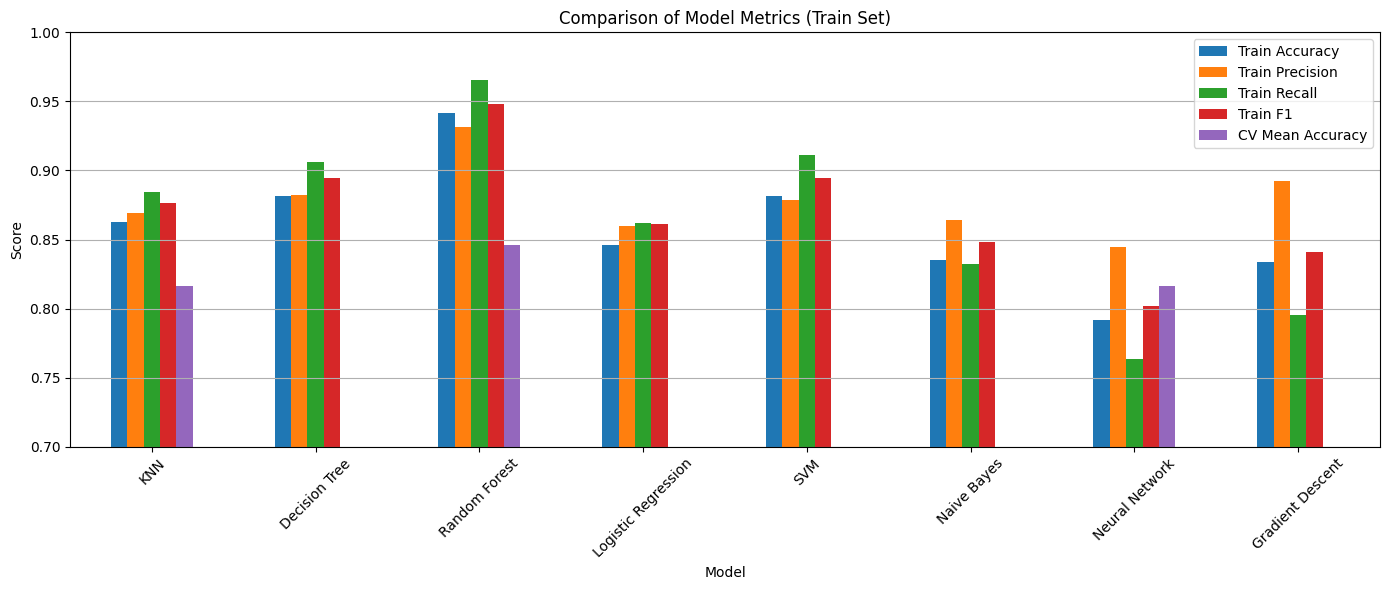

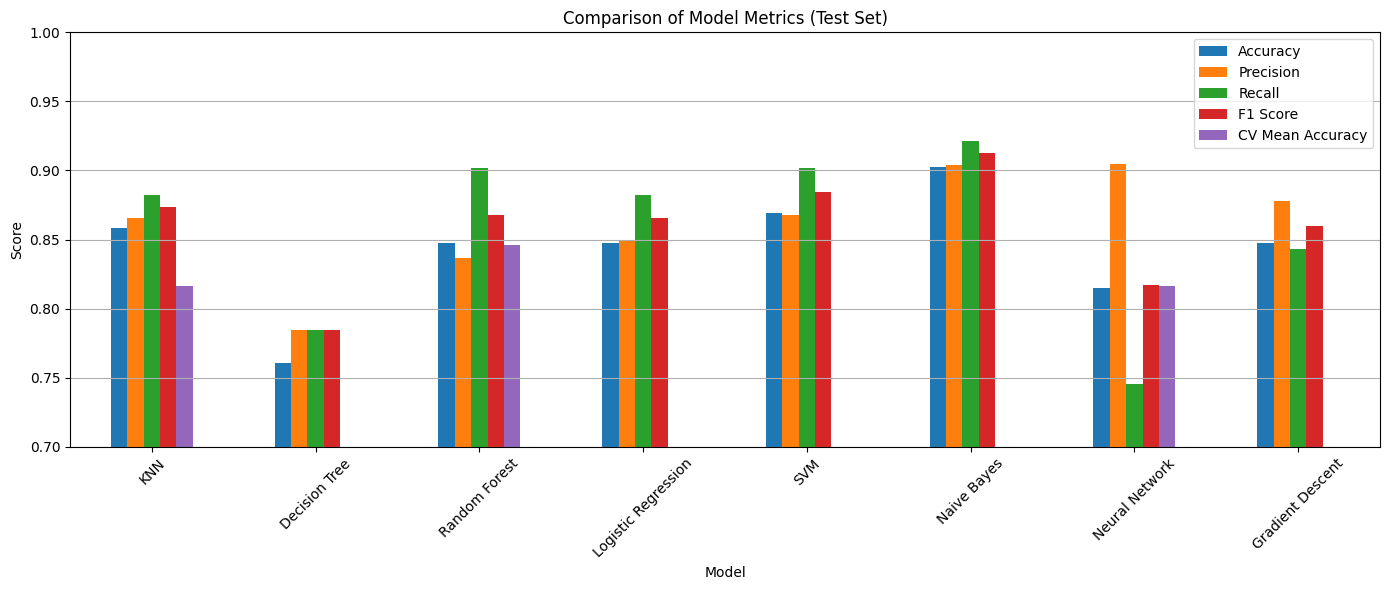

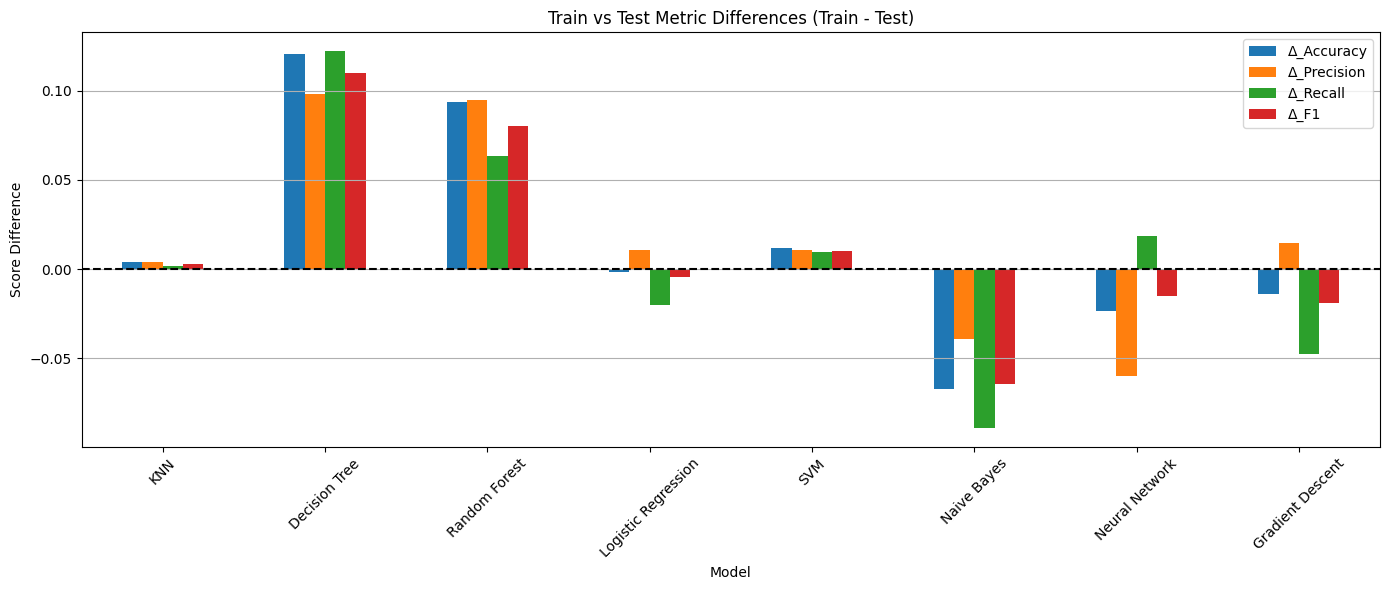

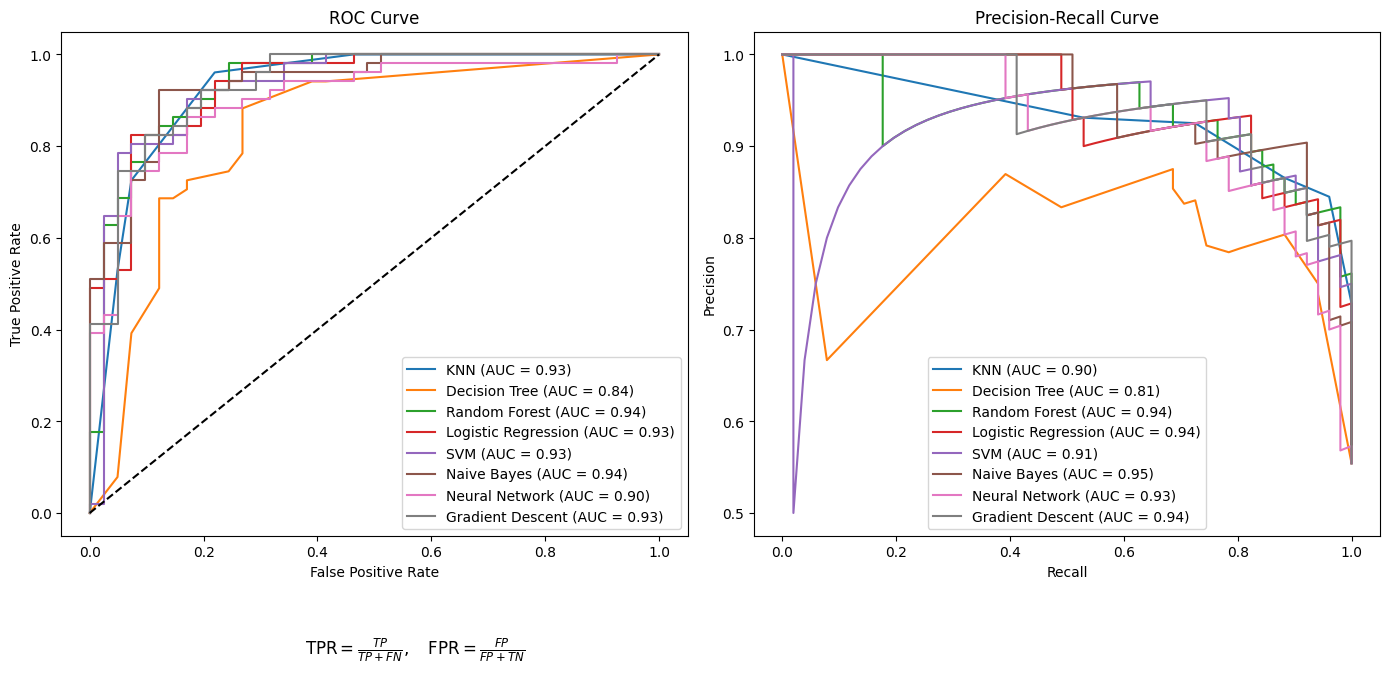

In [30]:
# 评估模型
"""
Evalutation 
Author: guangsai li,xianda xu  
Date: 4.18  
Function: Model Evalutation
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

for name, scores in model_scores.items():
    if "y_test_proba" in scores:
        scores["ROC AUC"] = roc_auc_score(y_test, scores["y_test_proba"])
        scores["PR AUC"] = average_precision_score(y_test, scores["y_test_proba"])
# 转换为 DataFrame
df_models = pd.DataFrame(model_scores).T
df_models.index.name = "Model"
# print(df_models)     

# Train metrics
train_metrics = df_models[
    ["Train Accuracy", "Train Precision", "Train Recall", "Train F1", "CV Mean Accuracy"]
].fillna(0)
train_metrics.index = df_models.index  # 确保 index 是模型名
train_metrics.plot(kind="bar", figsize=(14, 6))
plt.title("Comparison of Model Metrics (Train Set)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Test metrics
test_metrics = df_models[
    ["Accuracy", "Precision", "Recall", "F1 Score", "CV Mean Accuracy"]
]
test_metrics.index = df_models.index  # 确保 index 是模型名
test_metrics.plot(kind="bar", figsize=(14, 6))
plt.title("Comparison of Model Metrics (Test Set)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# 计算训练 - 测试差值（用于判断是否过拟合）
df_models["Δ_Accuracy"] = df_models["Train Accuracy"] - df_models["Accuracy"]
df_models["Δ_Precision"] = df_models["Train Precision"] - df_models["Precision"]
df_models["Δ_Recall"] = df_models["Train Recall"] - df_models["Recall"]
df_models["Δ_F1"] = df_models["Train F1"] - df_models["F1 Score"]

# 绘制差值图
fig, ax = plt.subplots(figsize=(14, 6))
df_models[["Δ_Accuracy", "Δ_Precision", "Δ_Recall", "Δ_F1"]].plot(kind="bar", ax=ax)
plt.axhline(0, color="black", linestyle="--")
plt.title("Train vs Test Metric Differences (Train - Test)")
plt.ylabel("Score Difference")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

def plot_roc_pr_curves(model_scores, y_test):
    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    for name, scores in model_scores.items():
        if "y_test_proba" in scores:
            fpr, tpr, _ = roc_curve(y_test, scores["y_test_proba"])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.figtext(
    0.3, -0.1,
    r"$\mathrm{TPR} = \frac{TP}{TP + FN}, \quad \mathrm{FPR} = \frac{FP}{FP + TN}$",
    ha='center', fontsize=12
)
    # PR Curve
    plt.subplot(1, 2, 2)
    for name, scores in model_scores.items():
        if "y_test_proba" in scores:
            precision, recall, _ = precision_recall_curve(y_test, scores["y_test_proba"])
            pr_auc = average_precision_score(y_test, scores["y_test_proba"])
            plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
# 调用它：
plot_roc_pr_curves(model_scores, y_test)





## 最终结论：随机森林（Random Forest）为最优模型

在本次疾病预测任务中，经过多维度评估，随机森林（Random Forest）被选为最合适的模型，尤其适用于医学场景中需要最大程度避免漏诊的情况。该结论基于以下几个方面：

### 1. 识别能力突出：Recall 和 AUC 指标领先
- 测试集 Recall = 0.859：能够识别大多数真实患病个体，漏诊率较低
- PR AUC = 0.95：在 Precision-Recall 曲线上表现最佳，适用于不平衡样本的医学诊断场景
- ROC AUC = 0.93：整体区分能力强，准确识别正负样本

### 2. 模型稳定性强
- 训练集与测试集各项指标差距适中，无明显过拟合
- 交叉验证准确率均值 = 0.8487，与测试集非常接近，表明模型在不同数据划分下具有良好的泛化能力

### 3. 整体指标表现平衡
- Precision ≈ 0.84：误诊率较低，模型输出可信度较高
- F1 Score ≈ 0.87：在保持召回的同时兼顾了精度
- 各项指标均衡优秀，表现全面稳定

### 4. 在敏感性、稳定性与整体性能之间达成最佳平衡
- 相比其他模型（如 SVM、决策树）虽有较高召回率，但部分存在训练/测试差距偏大的现象
- 如梯度下降等模型虽稳定，但整体表现偏弱
- 随机森林在关键医学评估维度中均表现出色，是当前综合性能最优的模型

**结论**：在强调避免漏诊的医疗预测任务中，综合考虑模型的识别能力、稳定性和整体性能，随机森林是最值得推荐的模型。
## Final Conclusion: Random Forest as the Best Model

In this disease prediction task, Random Forest has been selected as the most appropriate model after comprehensive evaluation. It is particularly suitable for medical scenarios where minimizing false negatives (missed diagnoses) is critical. The decision is based on the following aspects:

### 1. Outstanding Detection Ability: High Recall and AUC Scores
- Test set Recall = 0.859: effectively identifies the majority of actual positive (sick) cases, minimizing missed diagnoses.
- PR AUC = 0.95: highest among all models, making it highly suitable for imbalanced medical classification.
- ROC AUC = 0.93: demonstrates strong overall discriminative power.

### 2. High Stability and Generalization
- Moderate differences between training and testing metrics indicate no severe overfitting.
- Cross-validation mean accuracy = 0.8487, closely aligned with the test set performance, indicating consistent behavior across data splits.

### 3. Balanced Overall Performance
- Precision ≈ 0.84: low false positive rate, high prediction reliability.
- F1 Score ≈ 0.87: well-balanced trade-off between precision and recall.
- All major classification metrics are consistently high, demonstrating robustness.

### 4. Optimal Balance Between Sensitivity, Stability, and Overall Performance
- While other models (e.g., SVM, Decision Tree) have high recall, they exhibit larger train-test gaps.
- Models like Gradient Descent show stability but underperform in classification strength.
- Random Forest achieves top scores in all critical medical evaluation dimensions, making it the most balanced and reliable choice.

**Conclusion**: For high-risk medical prediction tasks that emphasize minimizing missed diagnoses, Random Forest is the most recommended model based on its excellent recall, stability, and comprehensive performance.


## Predict result

In [31]:
# 选择合适的模型后进行结果预测